Bearman et al. 2004, Chains of Affection: The Structure of Adolescent Romantic and Sexual Networks

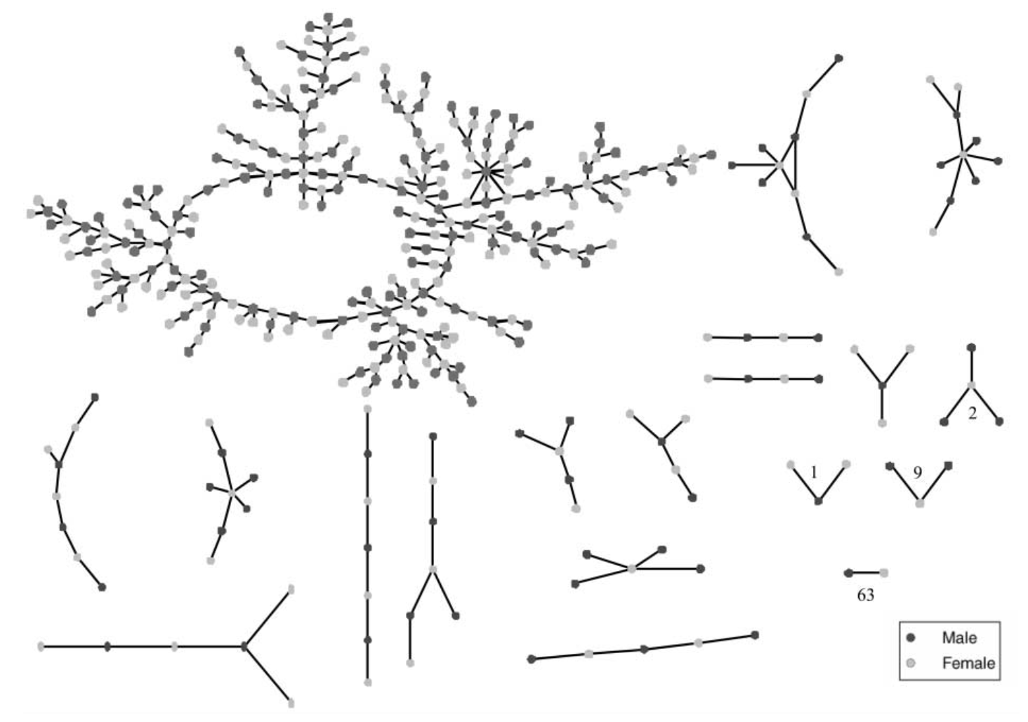

## Create a random network

In [ ]:
degreehist = c(338, 139, 59, 28, 6, 1, 1)

In [ ]:
numnodes = sum(degreehist)

In [ ]:
nodes = data.frame(id=1:numnodes, degree=sample(1:7, numnodes, replace=T, prob=degreehist / numnodes), done=0)

In [ ]:
head(nodes)

In [ ]:
edgelist = data.frame(id1=c(), id2=c())

In [ ]:
while (sum(nodes$done == 0) > 1) {
    incomplete = which(nodes$degree > nodes$done)
    connect = sample(incomplete, 2)
    nodes$done[connect] = nodes$done[connect] + 1
    edgelist = rbind(edgelist, data.frame(id1=connect[1], id2=connect[2]))
}

In [ ]:
head(edgelist)

In [ ]:
library(igraph)

In [ ]:
net = graph_from_edgelist(as.matrix(edgelist), directed=F)

In [ ]:
plot(net, vertex.size=3, vertex.label=NA, edge.width=3)

In [ ]:
nodes$gender = sample(c('M', 'F'), nrow(nodes), replace=T)

In [ ]:
edgelist = data.frame(id1=c(), id2=c())
nodes$done = 0
while (sum(nodes$done == 0) > 1) {
    incomplete = which(nodes$degree > nodes$done)
    boys = incomplete[nodes$gender[incomplete] == 'M']
    girls = incomplete[nodes$gender[incomplete] == 'F']
    if (length(boys) == 0 || length(girls) == 0)
        break
    connect = c(sample(boys, 1), sample(girls, 1))
    nodes$done[connect] = nodes$done[connect] + 1
    edgelist = rbind(edgelist, data.frame(id1=connect[1], id2=connect[2]))
}

In [ ]:
head(nodes)

In [ ]:
net = graph_from_edgelist(as.matrix(edgelist), directed=F)
plot(net, vertex.size=3, vertex.label=NA, edge.width=3)